In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('./dataset/Wholesale customers data.csv')

In [3]:
df.head(5)

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


### **Section A: Data Understanding & Preprocessing**

1. **Feature Overview**
    - What are the six spending features in the dataset, and what do they represent?

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Channel           440 non-null    int64
 1   Region            440 non-null    int64
 2   Fresh             440 non-null    int64
 3   Milk              440 non-null    int64
 4   Grocery           440 non-null    int64
 5   Frozen            440 non-null    int64
 6   Detergents_Paper  440 non-null    int64
 7   Delicassen        440 non-null    int64
dtypes: int64(8)
memory usage: 27.6 KB


##### 2. **Exploratory Data Analysis (EDA)**
    - Plot pairwise scatterplots or correlations among features. What patterns or relationships emerge?

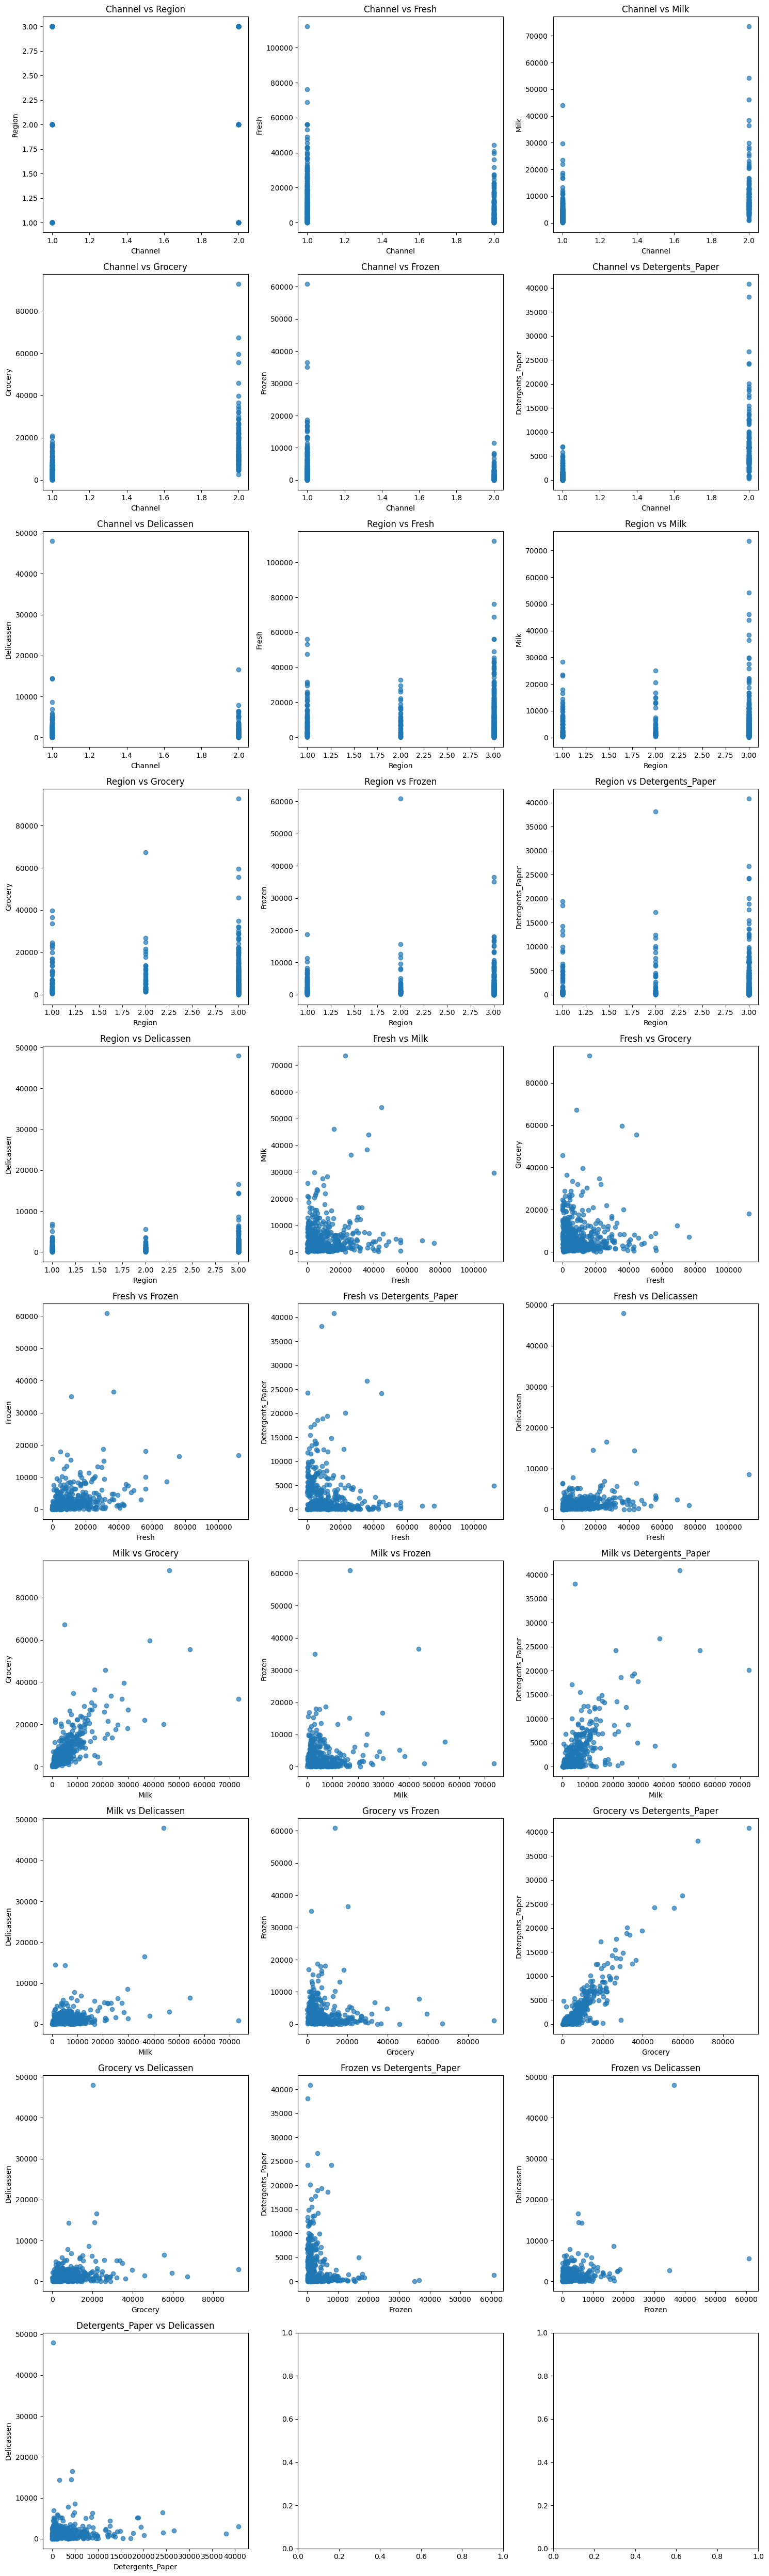

In [5]:
import matplotlib.pyplot as plt
import itertools

columns = df.columns
pairs = list(itertools.combinations(columns,2))

fig, axes = plt.subplots(len(pairs)//3 + 1, 3, figsize=(15, 5 * (len(pairs)//3 + 1)))
axes = axes.flatten()

for ax,(xcol,ycol) in zip(axes,pairs):
    ax.scatter(df[xcol],df[ycol],alpha=0.7)
    ax.set_xlabel(xcol)
    ax.set_ylabel(ycol)
    ax.set_title(f"{xcol} vs {ycol}")
plt.tight_layout()
plt.show()

In [6]:
df.corr()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
Channel,1.000000,0.062028,-0.169172,0.460720,0.608792,-0.202046,0.636026,0.056011
Region,0.062028,1.000000,0.055287,0.032288,0.007696,-0.021044,-0.001483,0.045212
Fresh,-0.169172,0.055287,1.000000,0.100510,-0.011854,0.345881,-0.101953,0.244690
Milk,0.460720,0.032288,0.100510,1.000000,0.728335,0.123994,0.661816,0.406368
Grocery,0.608792,0.007696,-0.011854,0.728335,1.000000,-0.040193,0.924641,0.205497
Frozen,-0.202046,-0.021044,0.345881,0.123994,-0.040193,1.000000,-0.131525,0.390947
Detergents_Paper,0.636026,-0.001483,-0.101953,0.661816,0.924641,-0.131525,1.000000,0.069291
Delicassen,0.056011,0.045212,0.244690,0.406368,0.205497,0.390947,0.069291,1.000000


In [7]:
df.describe()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,1.322727,2.543182,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,0.468052,0.774272,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,1.000000,1.000000,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,1.000000,2.000000,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,1.000000,3.000000,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,2.000000,3.000000,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,2.000000,3.000000,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


##### 3. **Feature Scaling**
    - Do the features need normalization or standardization for DBSCAN? Why?
    
DBSCAN uses distance metrics (commonly Euclidean distance) to determine neighborhood relationships (eps radius).

If one feature has a much larger range than others (e.g., Fresh in thousands vs Channel as 1 or 2), it will dominate the distance calculation.

This can cause DBSCAN to form clusters based mostly on that high-range feature, ignoring others.

How to scale:
Standardization (Z-score): (x - mean) / std → good if data is roughly normally distributed.
Normalization (Min-Max): (x - min) / (max - min) → scales all features to [0,1], useful for bounded ranges.

Rule of thumb for DBSCAN:
StandardScaler (from sklearn.preprocessing) is most common before DBSCAN.
Scale before tuning eps and min_samples.

In [8]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN
import matplotlib.pyplot as plt
import seaborn as sns

scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)

In [9]:
df_scaled[:,4].min()

-0.8373343668922592

##### 4. **Dimensionality Reduction**
    - Use PCA to reduce dimensions to 2 or 3. Visualize the data—do clusters or outliers become more apparent?

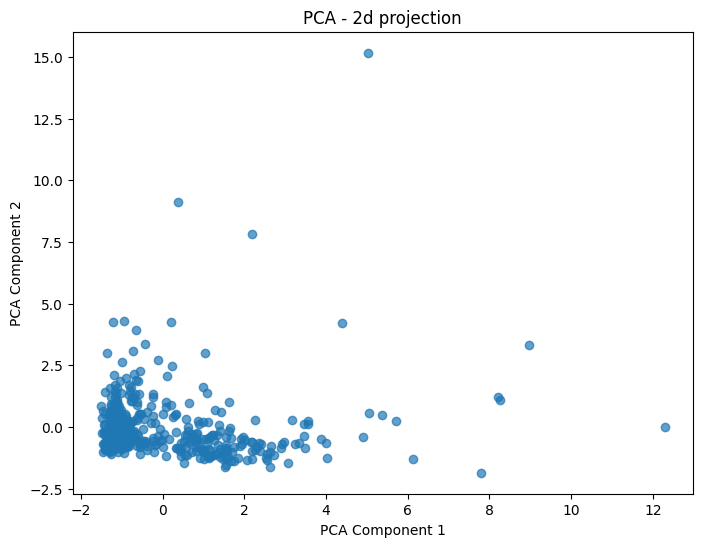

In [10]:
from sklearn.decomposition import PCA
from mpl_toolkits.mplot3d import Axes3D

pca_2d = PCA(n_components = 2)
X_pca_2d = pca_2d.fit_transform(df_scaled)

plt.figure(figsize=(8,6))
plt.scatter(X_pca_2d[:,0],X_pca_2d[:,1],alpha=0.7)
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('PCA - 2d projection')
plt.show()

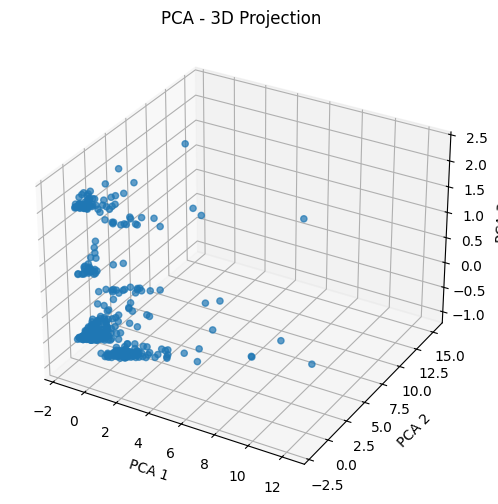

In [11]:
pca_3d = PCA(n_components = 3)
X_pca_3d = pca_3d.fit_transform(df_scaled)

fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111,projection='3d')
ax.scatter(X_pca_3d[:,0],X_pca_3d[:,1],X_pca_3d[:,2],alpha=0.7)
ax.set_xlabel('PCA 1')
ax.set_ylabel('PCA 2')
ax.set_zlabel('PCA 3')
ax.set_title('PCA - 3D Projection')
plt.show()

### **Section B: Parameter Selection & Tuning**

1. **k-Distance Plot**
    - For each point, compute the distance to its 5th nearest neighbor. Sort these distances and plot them. How can this help determine a suitable `eps` value?

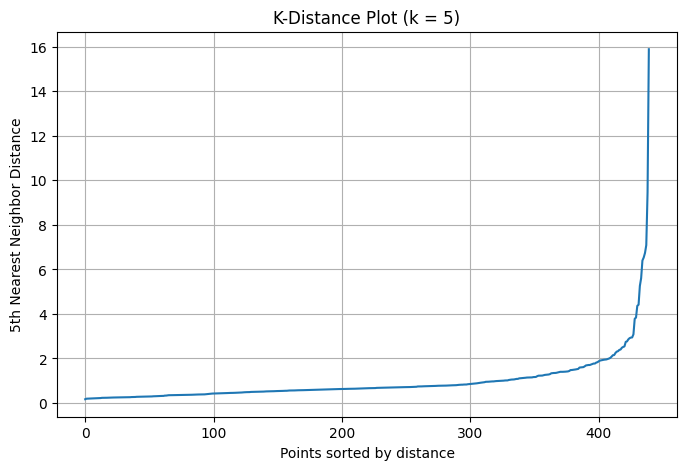

In [12]:
from sklearn.neighbors import NearestNeighbors
import numpy as np
k = 5

neighbors = NearestNeighbors(n_neighbors = k)
neighbors_fit = neighbors.fit(df_scaled)
distances,indices = neighbors_fit.kneighbors(df_scaled)

k_distances = distances[:,k-1]

k_distances = np.sort(k_distances)

plt.figure(figsize=(8,5))
plt.plot(k_distances)
plt.xlabel('Points sorted by distance')
plt.ylabel(f'{k}th Nearest Neighbor Distance')
plt.title(f"K-Distance Plot (k = {k})")
plt.grid(True)
plt.show()

###### 2. **Experiment with `eps`**
    - Test `eps` values ranging from small to large. For each, record:
        - Number of clusters found
        - Number of noise points (label = -1)

In [13]:
import numpy as np
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler

eps_values = np.linspace(0.1,20,30)

results = []

for eps in eps_values:
    dbscan = DBSCAN(eps=eps,min_samples=5)
    labels = dbscan.fit_predict(df_scaled)
    
    n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
    
    n_noise = np.sum(labels == -1)
    
    results.append({"eps":eps,"clusters":n_clusters,"noise_points":n_noise})
    
df_results = pd.DataFrame(results)
df_results

,eps,clusters,noise_points
0,0.100000,0,440
1,0.786207,5,123
2,1.472414,2,47
3,2.158621,1,15
4,2.844828,1,12
5,3.531034,1,11
6,4.217241,1,8
7,4.903448,1,5
8,5.589655,1,3
9,6.275862,1,1


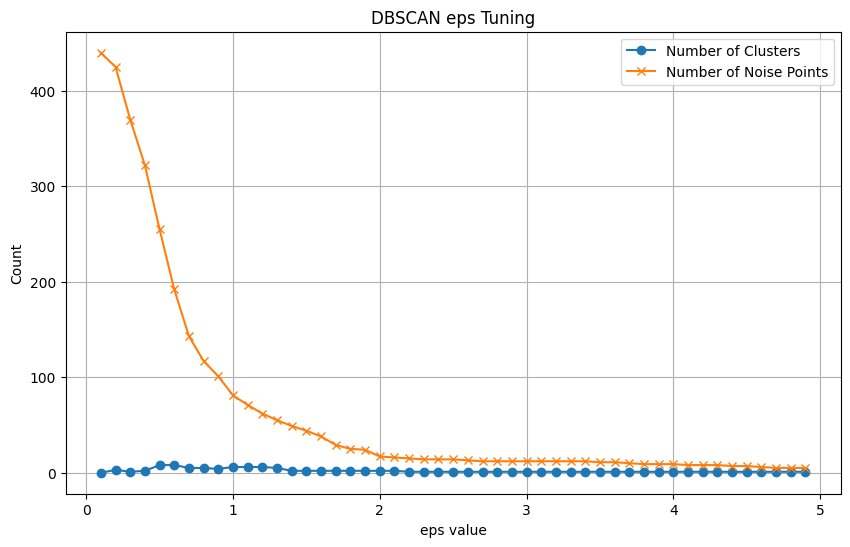

In [14]:
import numpy as np
import pandas as pd
from sklearn.cluster import DBSCAN
import matplotlib.pyplot as plt

# Assuming your scaled dataset is in X_scaled
eps_values = np.arange(0.1, 5, 0.1)  # adjust step & range as needed
clusters_count = []
noise_count = []

for eps in eps_values:
    dbscan = DBSCAN(eps=eps, min_samples=5)
    labels = dbscan.fit_predict(df_scaled)
    
    # Number of clusters (excluding noise label -1)
    n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
    clusters_count.append(n_clusters)
    
    # Number of noise points
    n_noise = list(labels).count(-1)
    noise_count.append(n_noise)

# Plot the results
plt.figure(figsize=(10,6))
plt.plot(eps_values, clusters_count, marker='o', label='Number of Clusters')
plt.plot(eps_values, noise_count, marker='x', label='Number of Noise Points')
plt.xlabel('eps value')
plt.ylabel('Count')
plt.title('DBSCAN eps Tuning')
plt.legend()
plt.grid(True)
plt.show()

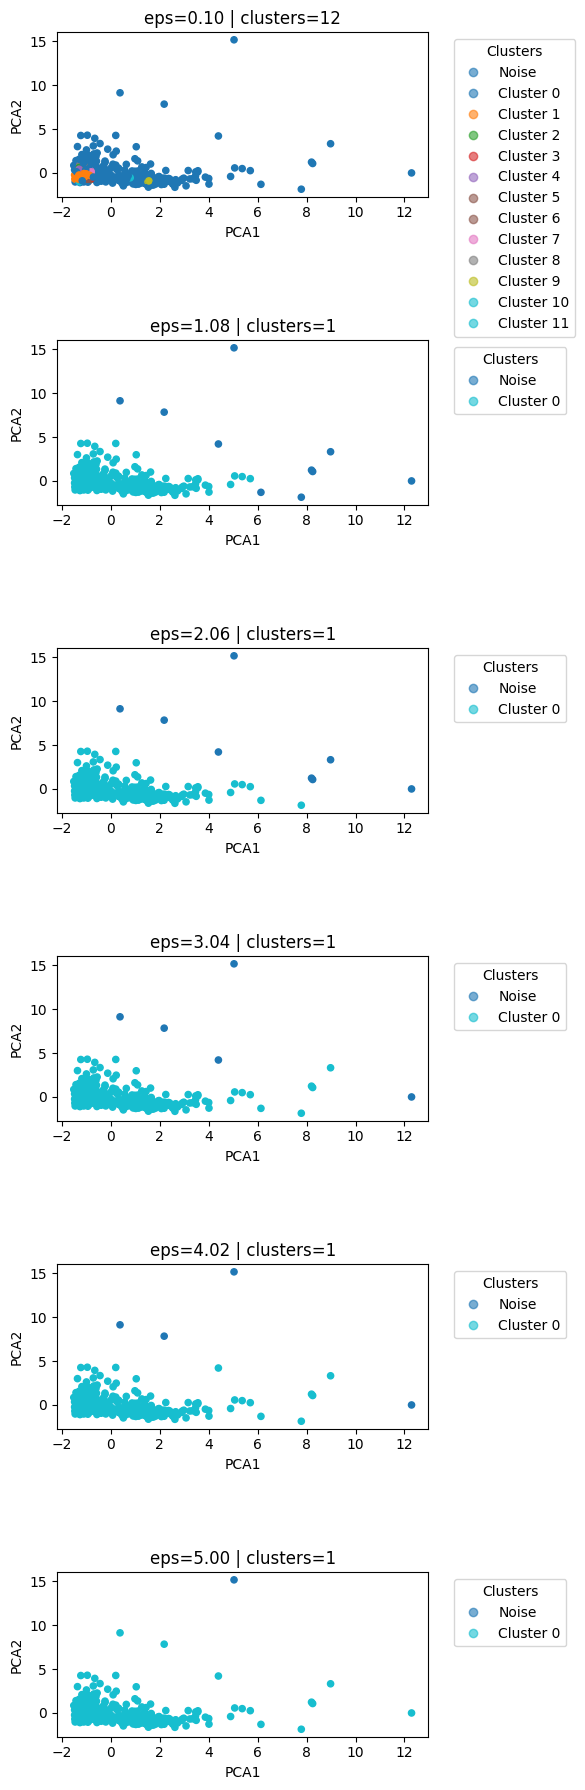

In [17]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN

# eps_values = np.linspace(0.1,5,20)
eps_values = np.linspace(0.1, 5, 6)
plt.figure(figsize=(6,3*len(eps_values)))

for i, eps in enumerate(eps_values,start=1):
    dbscan = DBSCAN(eps=eps,min_samples=5).fit(X_pca_2d)
    labels = dbscan.labels_
    
    plt.subplot(len(eps_values),1,i)
    scatter = plt.scatter(X_pca_2d[:,0],X_pca_2d[:,1],c=labels,cmap='tab10',s=20)
    
    n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
    plt.title(f"eps={eps:.2f} | clusters={n_clusters}")
    plt.xlabel('PCA1')
    plt.ylabel('PCA2')
    
    #Add legend
    handles,_ = scatter.legend_elements(prop="colors",alpha=0.6)
    legend_labels = [f"Cluster {lab}" if lab !=-1 else "Noise" for lab in sorted(set(labels))]
    plt.legend(handles,legend_labels,title="Clusters",bbox_to_anchor=(1.05,1),loc='upper left')
    
plt.tight_layout()
plt.show()

##### When you use DBSCAN, finding the best eps (epsilon) is not about "tuning" in the same way as k-means — there’s no fixed k.
Instead, you generally determine it using distance-based heuristics.
Here are the main approaches:

##### 1. k-distance plot (most common)
For DBSCAN, a common trick is to plot the sorted distances of each point to its k-th nearest neighbor, where k = min_samples - 1.
The "elbow" point in this plot gives a good starting eps.
Steps:
from sklearn.neighbors import NearestNeighbors
import numpy as np
import matplotlib.pyplot as plt

min_samples = 5
neighbors = NearestNeighbors(n_neighbors=min_samples)
neighbors_fit = neighbors.fit(X_pca_2d)
distances, indices = neighbors_fit.kneighbors(X_pca_2d)

//Take the k-th NN distance (sorted)
distances = np.sort(distances[:, min_samples-1])
plt.plot(distances)
plt.ylabel(f"{min_samples}th NN Distance")
plt.xlabel("Points sorted by distance")
plt.title("k-distance graph")
plt.show()
Look for the "knee"/"elbow" in the curve — that’s your candidate eps.

##### 2. Silhouette score (if you want a quantitative metric)
Try multiple eps values and calculate the silhouette score (higher is better).
Works only if clusters are reasonably separable and not all noise.
from sklearn.metrics import silhouette_score

eps_values = np.linspace(0.1, 5, 30)
scores = []

for eps in eps_values:
    labels = DBSCAN(eps=eps, min_samples=5).fit_predict(X_pca_2d)
    if len(set(labels)) > 1 and -1 not in set(labels):  # Avoid only noise or single cluster
        score = silhouette_score(X_pca_2d, labels)
        scores.append((eps, score))

best_eps = max(scores, key=lambda x: x[1])[0]
print(f"Best eps based on silhouette: {best_eps}")

##### 3. Domain knowledge
If your dataset represents something with known scales (e.g., geographical coordinates, embeddings), pick eps close to the distance threshold where points should be considered "neighbors" in your problem.

##### Therefore, based on the k-distance plot , and the plots above, we decide the value of 4.02 to be the best epsilon value for our clustering,.

##### 3. **Experiment with `min_samples`**
    - Keep `eps` fixed and vary `min_samples` (e.g., from 3 to 10). Observe how cluster formation and noise labeling change.

In [25]:
eps=4.02

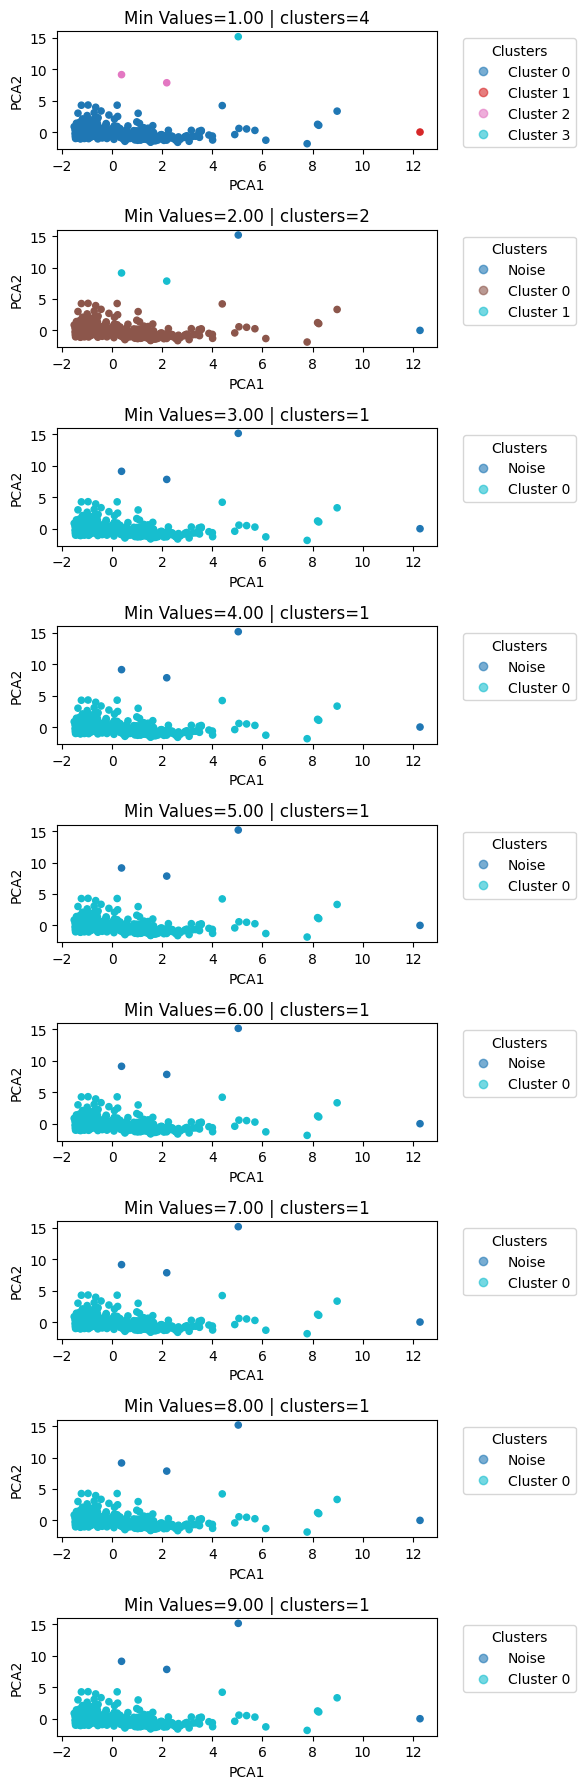

In [26]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN

# eps_values = np.linspace(0.1,5,20)
min_values = range(1,10,1)
plt.figure(figsize=(6,3*len(eps_values)))

for i, min_value in enumerate(min_values,start=1):
    dbscan = DBSCAN(eps=eps,min_samples=min_value).fit(X_pca_2d)
    labels = dbscan.labels_
    
    plt.subplot(len(min_values),1,i)
    scatter = plt.scatter(X_pca_2d[:,0],X_pca_2d[:,1],c=labels,cmap='tab10',s=20)
    
    n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
    plt.title(f"Min Values={min_value:.2f} | clusters={n_clusters}")
    plt.xlabel('PCA1')
    plt.ylabel('PCA2')
    
    #Add legend
    handles,_ = scatter.legend_elements(prop="colors",alpha=0.6)
    legend_labels = [f"Cluster {lab}" if lab !=-1 else "Noise" for lab in sorted(set(labels))]
    plt.legend(handles,legend_labels,title="Clusters",bbox_to_anchor=(1.05,1),loc='upper left')
    
plt.tight_layout()
plt.show()

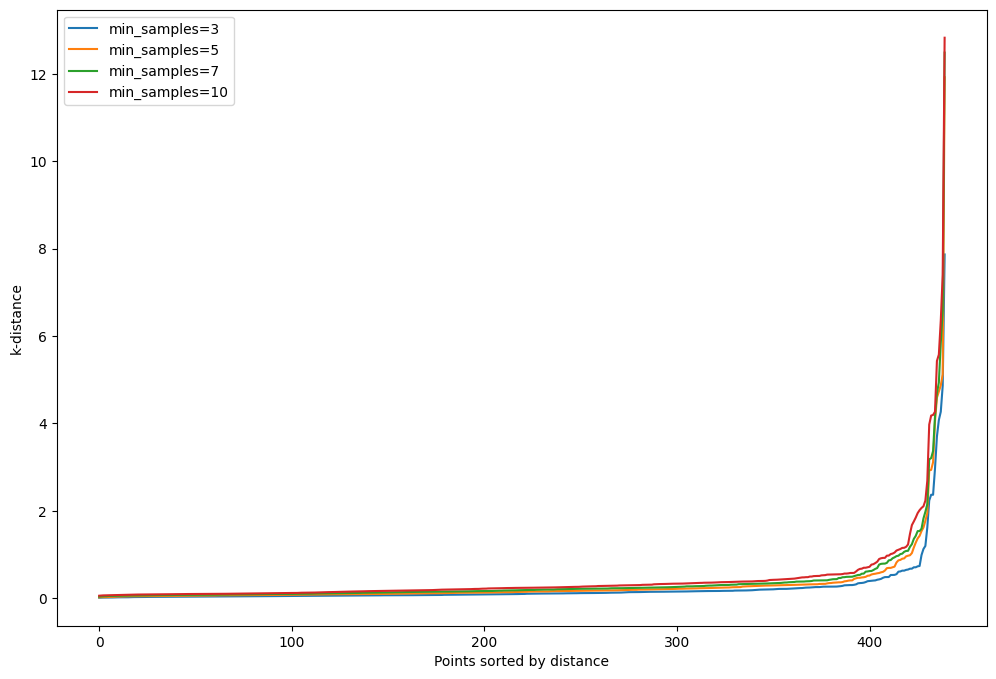

In [22]:
from sklearn.neighbors import NearestNeighbors
import numpy as np
import matplotlib.pyplot as plt

X = X_pca_2d  # your dataset (2D or higher)

# Try different min_samples values
min_samples_list = [3, 5, 7, 10]

plt.figure(figsize=(12, 8))
for ms in min_samples_list:
    neigh = NearestNeighbors(n_neighbors=ms)
    nbrs = neigh.fit(X)
    distances, indices = nbrs.kneighbors(X)
    distances = np.sort(distances[:, ms-1])  # k-th NN distance
    plt.plot(distances, label=f"min_samples={ms}")

plt.xlabel("Points sorted by distance")
plt.ylabel("k-distance")
plt.legend()
plt.show()

###### What is Silhouette Score ? How is it calculated ? What is its significance ?


In [23]:
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score

best_score = -1
best_params = None

for ms in range(3, 11):
    for eps in np.linspace(0.1, 5, 20):
        db = DBSCAN(eps=eps, min_samples=ms).fit(X)
        labels = db.labels_
        if len(set(labels)) > 1 and len(set(labels)) != len(X):  # valid clustering
            score = silhouette_score(X, labels)
            if score > best_score:
                best_score = score
                best_params = (eps, ms)

print("Best params:", best_params, "Silhouette Score:", best_score)

Best params: (4.226315789473684, 3) Silhouette Score: 0.8551760383908255
